# EDA

- Merge opponent stats
- Add advanced stats:
 - PACE, OFFrtg, DEFrtg
- Delete outliers 
- Stat comparism
- Individual team trends


In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
first_3=pd.read_csv("first_3_clean.csv")
NBA_4th=pd.read_csv("NBA_4th_clean.csv")

In [3]:
first_3.head()

,Team,Match Up,Game Date,W/L,MIN,PTS,FGM,FGA,FG%,3PM,...,OREB,DREB,REB,AST,TOV,STL,BLK,PF,+/-,Court
0,PHI,PHI vs. DET,2020-03-11,W,36,99,32,62,0.516129,11,...,10,27,37,21,11,6,4,15,15,1
1,NYK,NYK @ ATL,2020-03-11,W,36,96,37,67,0.552239,7,...,6,32,38,26,10,9,8,13,18,0
2,MIA,MIA vs. CHA,2020-03-11,L,36,77,32,63,0.507937,11,...,7,18,25,27,14,7,5,11,-10,1
3,DET,DET @ PHI,2020-03-11,L,36,84,28,62,0.451613,11,...,5,19,24,20,8,8,2,20,-15,0
4,DEN,DEN @ DAL,2020-03-11,L,36,85,34,63,0.539683,13,...,2,30,32,21,9,4,2,11,1,0


In [4]:
NBA_4th.head()

,Team,Match Up,Game Date,W/L,MIN,PTS,FGM,FGA,FG%,3PM,...,OREB,DREB,REB,AST,TOV,STL,BLK,PF,+/-,Court
0,PHI,PHI vs. DET,2020-03-11,W,12,25,10,21,47.6,3,...,3,10,13,7,3,1,0,3,3,1
1,NYK,NYK @ ATL,2020-03-11,W,12,22,8,19,42.1,2,...,0,5,5,2,1,3,1,8,-18,0
2,MIA,MIA vs. CHA,2020-03-11,L,12,21,7,21,33.3,4,...,2,9,11,5,0,1,0,6,-1,1
3,DET,DET @ PHI,2020-03-11,L,12,22,11,22,50.0,0,...,1,7,8,5,1,2,1,4,-3,0
4,DEN,DEN @ DAL,2020-03-11,L,12,12,5,20,25.0,1,...,1,7,8,2,7,2,2,9,-17,0


### Merge opponent stats

In [5]:
NBA_4th["Opponent"]=NBA_4th["Match Up"].apply(lambda x:  str(x).split(" ")[2] )


In [6]:
Home=NBA_4th[NBA_4th["Court"]==1]
Home.head(10)

,Team,Match Up,Game Date,W/L,MIN,PTS,FGM,FGA,FG%,3PM,...,DREB,REB,AST,TOV,STL,BLK,PF,+/-,Court,Opponent
0,PHI,PHI vs. DET,2020-03-11,W,12,25,10,21,47.6,3,...,10,13,7,3,1,0,3,3,1,DET
2,MIA,MIA vs. CHA,2020-03-11,L,12,21,7,21,33.3,4,...,9,11,5,0,1,0,6,-1,1,CHA
5,DAL,DAL vs. DEN,2020-03-11,W,12,29,10,23,43.5,1,...,12,18,5,4,5,0,3,17,1,DEN
7,ATL,ATL vs. NYK,2020-03-11,L,12,40,13,19,68.4,5,...,11,13,7,5,0,1,7,18,1,NYK
8,WAS,WAS vs. NYK,2020-03-10,W,12,35,10,18,55.6,4,...,8,12,6,5,0,1,6,7,1,NYK
9,SAS,SAS vs. DAL,2020-03-10,W,12,36,13,21,61.9,4,...,10,12,7,3,2,4,4,12,1,DAL
10,POR,POR vs. PHX,2020-03-10,W,12,39,14,22,63.6,7,...,11,14,6,3,1,2,6,12,1,PHX
15,MEM,MEM vs. ORL,2020-03-10,L,12,29,8,17,47.1,2,...,8,9,5,4,1,0,6,-6,1,ORL
16,LAL,LAL vs. BKN,2020-03-10,L,12,22,9,24,37.5,3,...,11,13,4,2,1,0,7,5,1,BKN
18,IND,IND vs. BOS,2020-03-10,L,12,31,12,24,50.0,3,...,8,11,5,1,1,3,6,11,1,BOS


In [7]:
Away=NBA_4th[NBA_4th["Court"]==0]
Away.head(10)

,Team,Match Up,Game Date,W/L,MIN,PTS,FGM,FGA,FG%,3PM,...,DREB,REB,AST,TOV,STL,BLK,PF,+/-,Court,Opponent
1,NYK,NYK @ ATL,2020-03-11,W,12,22,8,19,42.1,2,...,5,5,2,1,3,1,8,-18,0,ATL
3,DET,DET @ PHI,2020-03-11,L,12,22,11,22,50.0,0,...,7,8,5,1,2,1,4,-3,0,PHI
4,DEN,DEN @ DAL,2020-03-11,L,12,12,5,20,25.0,1,...,7,8,2,7,2,2,9,-17,0,DAL
6,CHA,CHA @ MIA,2020-03-11,W,12,22,7,18,38.9,4,...,11,14,3,2,0,1,3,1,0,MIA
11,PHX,PHX @ POR,2020-03-10,L,12,27,6,18,33.3,3,...,4,4,5,1,0,1,5,-12,0,POR
12,ORL,ORL @ MEM,2020-03-10,W,12,35,11,20,55.0,6,...,8,9,10,3,1,0,9,6,0,MEM
13,NYK,NYK @ WAS,2020-03-10,L,12,28,10,21,47.6,2,...,4,5,8,2,2,1,9,-7,0,WAS
14,MIN,MIN @ HOU,2020-03-10,L,12,31,10,20,50.0,3,...,5,7,7,2,2,0,2,-3,0,HOU
17,LAC,LAC @ GSW,2020-03-10,W,12,20,5,21,23.8,4,...,12,13,5,4,1,1,6,-10,0,GSW
21,DAL,DAL @ SAS,2020-03-10,L,12,24,9,23,39.1,2,...,6,8,2,2,2,0,6,-12,0,SAS


In [8]:
Home=Home.sort_values(by=["Game Date","Team"],ascending=False).reset_index()

In [9]:
Away=Away.sort_values(by=["Game Date","Opponent"],ascending=False).reset_index()

In [10]:
Away.columns

Index(['index', 'Team', 'Match Up', 'Game Date', 'W/L', 'MIN', 'PTS', 'FGM',
       'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB',
       'REB', 'AST', 'TOV', 'STL', 'BLK', 'PF', '+/-', 'Court', 'Opponent'],
      dtype='object')

In [11]:
Home[["OppPTS","OppFGM",'OppFGA', 'OppFG%', 'Opp3PM', 'Opp3PA', 'Opp3P%', 'OppFTM', 'OppFTA', 'OppFT%', 'OppOREB', 'OppDREB',
       'OppREB', 'OppAST', 'OppTOV', 'OppSTL', 'OppBLK', 'OppPF',]]=Away[["PTS","FGM",'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB',
       'REB', 'AST', 'TOV', 'STL', 'BLK', 'PF',]]

Away[["OppPTS","OppFGM",'OppFGA', 'OppFG%', 'Opp3PM', 'Opp3PA', 'Opp3P%', 'OppFTM', 'OppFTA', 'OppFT%', 'OppOREB', 'OppDREB',
       'OppREB', 'OppAST', 'OppTOV', 'OppSTL', 'OppBLK', 'OppPF',]]=Home[["PTS","FGM",'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB',
       'REB', 'AST', 'TOV', 'STL', 'BLK', 'PF',]]

In [12]:
temp=pd.concat([Home,Away]).sort_values(by="index").reset_index(drop=True)


In [13]:
check=temp["PTS"]-NBA_4th["PTS"]
check.unique()

array([0], dtype=int64)

In [14]:
first_3["Opponent"]=first_3["Match Up"].apply(lambda x:  str(x).split(" ")[2] )
Home1=first_3[first_3["Court"]==1]
Away1=first_3[first_3["Court"]==0]

In [15]:
Home1=Home1.sort_values(by=["Game Date","Team"],ascending=False).reset_index()
Away1=Away1.sort_values(by=["Game Date","Opponent"],ascending=False).reset_index()

In [16]:
Home1[["OppPTS","OppFGM",'OppFGA', 'OppFG%', 'Opp3PM', 'Opp3PA', 'Opp3P%', 'OppFTM', 'OppFTA', 'OppFT%', 'OppOREB', 'OppDREB',
       'OppREB', 'OppAST', 'OppTOV', 'OppSTL', 'OppBLK', 'OppPF',]]=Away1[["PTS","FGM",'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB',
       'REB', 'AST', 'TOV', 'STL', 'BLK', 'PF',]]

Away1[["OppPTS","OppFGM",'OppFGA', 'OppFG%', 'Opp3PM', 'Opp3PA', 'Opp3P%', 'OppFTM', 'OppFTA', 'OppFT%', 'OppOREB', 'OppDREB',
       'OppREB', 'OppAST', 'OppTOV', 'OppSTL', 'OppBLK', 'OppPF',]]=Home1[["PTS","FGM",'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB',
       'REB', 'AST', 'TOV', 'STL', 'BLK', 'PF',]]

In [17]:
temp1=pd.concat([Home1,Away1]).sort_values(by="index").reset_index(drop=True)
check=temp1["PTS"]-first_3["PTS"]
check.unique()

array([0], dtype=int64)

In [18]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [19]:
temp1.head()

,index,Team,Match Up,Game Date,W/L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,+/-,Court,Opponent,OppPTS,OppFGM,OppFGA,OppFG%,Opp3PM,Opp3PA,Opp3P%,OppFTM,OppFTA,OppFT%,OppOREB,OppDREB,OppREB,OppAST,OppTOV,OppSTL,OppBLK,OppPF
0,0,PHI,PHI vs. DET,2020-03-11,W,36,99,32,62,0.516129,11,24,0.458333,24,30,0.800000,10,27,37,21,11,6,4,15,15,1,DET,84,28,62,0.451613,11,31,0.354839,17,24,0.708333,5,19,24,20,8,8,2,20
1,1,NYK,NYK @ ATL,2020-03-11,W,36,96,37,67,0.552239,7,18,0.388889,15,17,0.882353,6,32,38,26,10,9,8,13,18,0,ATL,78,31,78,0.397436,8,27,0.296296,8,11,0.727273,12,23,35,16,10,6,2,14
2,2,MIA,MIA vs. CHA,2020-03-11,L,36,77,32,63,0.507937,11,31,0.354839,2,3,0.666667,7,18,25,27,14,7,5,11,-10,1,CHA,87,30,64,0.468750,13,23,0.565217,14,16,0.875000,12,24,36,17,12,7,3,6
3,3,DET,DET @ PHI,2020-03-11,L,36,84,28,62,0.451613,11,31,0.354839,17,24,0.708333,5,19,24,20,8,8,2,20,-15,0,PHI,99,32,62,0.516129,11,24,0.458333,24,30,0.800000,10,27,37,21,11,6,4,15
4,4,DEN,DEN @ DAL,2020-03-11,L,36,85,34,63,0.539683,13,25,0.520000,4,7,0.571429,2,30,32,21,9,4,2,11,1,0,DAL,84,32,69,0.463768,11,29,0.379310,9,15,0.600000,7,27,34,18,7,4,2,11


### Advanced stats

Possession= 0.5 * (( FGA + 0.4 *  FTA - 1.07 * ( OREB / ( OREB + Opp DREB)) * ( FGA -  FG) +  TOV) + (Opp FGA + 0.4 * Opp FTA - 1.07 * (Opp OREB / (Opp OREB +  DRB)) * (Opp FGA - Opp FGM) + Opp TOV))

Pace Calculation Formula=[240/(Team Minutes)]*(Possessionteam+Possessionopponent)/2

reference: https://www.basketball-reference.com/about/glossary.html#poss

In [21]:
temp["Pos"]=0.5*((temp.FGA+0.4*temp.FTA-1.07*(temp.OREB/(temp.OREB+temp.OppDREB))*(temp.FGA-temp.FGM)+temp.TOV)+(temp.OppFGA+0.4*temp.OppFTA-1.07*(temp.OppOREB/(temp.OppOREB+temp.DREB))*(temp.OppFGA-temp.OppFGM)+temp.OppTOV))
#opponent 
temp["OppPos"]=temp["Pos"]

In [22]:
temp["Pace"]=(240/60)*(temp.Pos+temp.OppPos)/2

In [23]:
temp["OFFRTG"]=(temp.PTS/temp.Pos)*100
temp["DEFRTG"]=(temp.OppPTS/temp.OppPos)*100

In [24]:
temp.head()

,index,Team,Match Up,Game Date,W/L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,+/-,Court,Opponent,OppPTS,OppFGM,OppFGA,OppFG%,Opp3PM,Opp3PA,Opp3P%,OppFTM,OppFTA,OppFT%,OppOREB,OppDREB,OppREB,OppAST,OppTOV,OppSTL,OppBLK,OppPF,Pos,OppPos,Pace,OFFRTG,DEFRTG
0,0,PHI,PHI vs. DET,2020-03-11,W,12,25,10,21,47.6,3,9,33.3,2,2,100.0,3,10,13,7,3,1,0,3,3,1,DET,22,11,22,50.0,0,4,0.0,0,1,0.0,1,7,8,5,1,2,1,4,21.799500,21.799500,87.198000,114.681529,100.919746
1,1,NYK,NYK @ ATL,2020-03-11,W,12,22,8,19,42.1,2,6,33.3,4,10,40.0,0,5,5,2,1,3,1,8,-18,0,ATL,40,13,19,68.4,5,9,55.6,9,11,81.8,2,11,13,7,5,0,1,7,25.282857,25.282857,101.131429,87.015482,158.209967
2,2,MIA,MIA vs. CHA,2020-03-11,L,12,21,7,21,33.3,4,13,30.8,3,3,100.0,2,9,11,5,0,1,0,6,-1,1,CHA,22,7,18,38.9,4,11,36.4,4,6,66.7,3,11,14,3,2,0,1,3,19.676442,19.676442,78.705769,106.726611,111.808830
3,3,DET,DET @ PHI,2020-03-11,L,12,22,11,22,50.0,0,4,0.0,0,1,0.0,1,7,8,5,1,2,1,4,-3,0,PHI,25,10,21,47.6,3,9,33.3,2,2,100.0,3,10,13,7,3,1,0,3,21.799500,21.799500,87.198000,100.919746,114.681529
4,4,DEN,DEN @ DAL,2020-03-11,L,12,12,5,20,25.0,1,14,7.1,1,1,100.0,1,7,8,2,7,2,2,9,-17,0,DAL,29,10,23,43.5,1,6,16.7,8,8,100.0,6,12,18,5,4,5,0,3,24.972692,24.972692,99.890769,48.052488,116.126846


In [25]:
temp1["Pos"]=0.5*((temp1.FGA+0.4*temp1.FTA-1.07*(temp1.OREB/(temp1.OREB+temp1.OppDREB))*(temp1.FGA-temp1.FGM)+temp1.TOV)+(temp1.OppFGA+0.4*temp1.OppFTA-1.07*(temp1.OppOREB/(temp1.OppOREB+temp1.DREB))*(temp1.OppFGA-temp1.OppFGM)+temp1.OppTOV))
temp1["OppPos"]=temp1["Pos"]


In [26]:
temp1["Pace"]=(240/180)*(temp1.Pos+temp1.OppPos)/2

In [27]:
temp1["OFFRTG"]=(temp1.PTS/temp1.Pos)*100
temp1["DEFRTG"]=(temp1.OppPTS/temp1.OppPos)*100

### Outliers

- I don´t want include games with big margin of victory, because in blowouts starters will be benchend early. 
- Big leads in the 3rd are also problematic, in a tough NBA schedule Teams don´t often


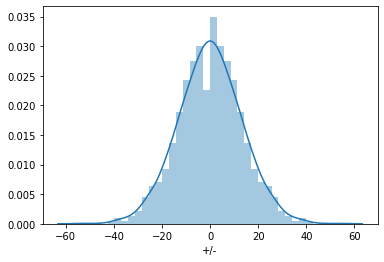

In [28]:
#"+/-" tell us the score difference in the quarter
sns.distplot(temp1["+/-"])

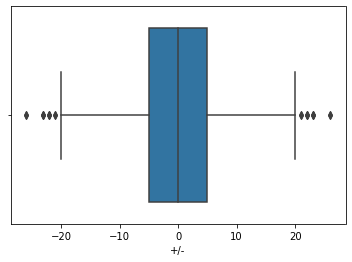

In [29]:
#This boxplot show´s that a team rarely outscore their opponent with more than 20 points in the 4th quarter
sns.boxplot(temp["+/-"])

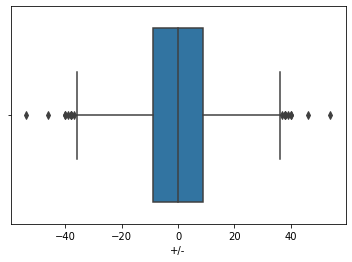

In [30]:
sns.boxplot(temp1["+/-"])

In [31]:
#Margin is the final score difference of a game
#because I don´t include the overtime period, Margin=0 is possible

temp["Margin"]=temp["+/-"]+temp1["+/-"]
temp1["Margin"]=temp["+/-"]+temp1["+/-"]

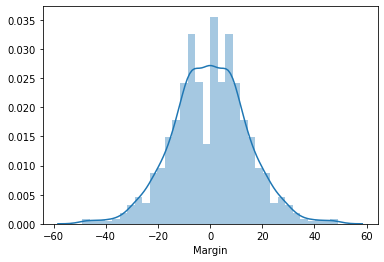

In [32]:
sns.distplot(temp["Margin"])

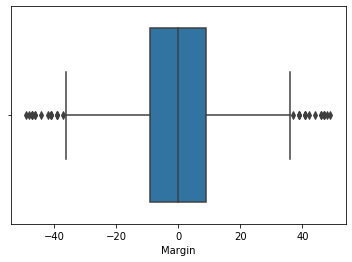

In [33]:
#Some outlier scores with big margins
sns.boxplot(temp["Margin"])

In [34]:
score_matrix=temp1.pivot_table(index=[pd.cut(temp1["+/-"], [0,3,6,9,12,15,20,25,30,40,60],include_lowest=True)],columns=pd.cut(temp1.Margin, [0,3,6,9,12,15,18,21,25,30,40,60],include_lowest=True),values="index",aggfunc="count")
score_matrix

Margin,"(-0.001, 3.0]","(3.0, 6.0]","(6.0, 9.0]","(9.0, 12.0]","(12.0, 15.0]","(15.0, 18.0]","(18.0, 21.0]","(21.0, 25.0]","(25.0, 30.0]","(30.0, 40.0]","(40.0, 60.0]"
+/-,,,,,,,,,,,
"(-0.001, 3.0]",65.0,30.0,36.0,14.0,8.0,2.0,1.0,NaN,1.0,NaN,NaN
"(3.0, 6.0]",30.0,23.0,28.0,23.0,10.0,4.0,2.0,5.0,NaN,1.0,NaN
"(6.0, 9.0]",17.0,14.0,30.0,24.0,13.0,12.0,5.0,1.0,1.0,NaN,NaN
"(9.0, 12.0]",15.0,19.0,22.0,18.0,20.0,13.0,9.0,4.0,3.0,NaN,NaN
"(12.0, 15.0]",5.0,8.0,17.0,16.0,15.0,11.0,11.0,4.0,5.0,NaN,NaN
"(15.0, 20.0]",6.0,9.0,14.0,8.0,18.0,6.0,22.0,14.0,7.0,7.0,NaN
"(20.0, 25.0]",NaN,1.0,3.0,6.0,4.0,5.0,9.0,8.0,15.0,5.0,NaN
"(25.0, 30.0]",NaN,NaN,NaN,2.0,4.0,4.0,7.0,5.0,6.0,2.0,3.0
"(30.0, 40.0]",NaN,NaN,NaN,1.0,NaN,NaN,NaN,4.0,5.0,4.0,7.0


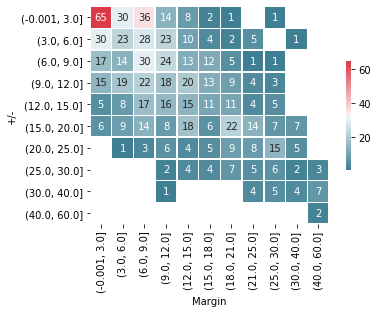

In [35]:
#Games where teams lead in the 3rd quarter and also won the game or overtime
#note: zero includes duplicate values, because in a game with tied score both teams have "+/-" or "Margin" of 0   
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(score_matrix, cmap=cmap,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [36]:
#table of teams who lead in the 3rd quarter, but lost the game or overtime
temp1.pivot_table(index=[pd.cut(temp1["+/-"], [0,3,6,9,12,15,20,25,30,40,60],include_lowest=True)],columns=pd.cut(temp1.Margin, [-30,-20,-15,-12,-9,-6,-3,-1,-0],include_lowest=True),values="index",aggfunc="count")

Margin,"(-20.0, -15.0]","(-15.0, -12.0]","(-12.0, -9.0]","(-9.0, -6.0]","(-6.0, -3.0]","(-3.0, -1.0]","(-1.0, 0.0]"
+/-,,,,,,,
"(-0.001, 3.0]",5.0,4.0,11.0,23.0,28.0,20.0,26.0
"(3.0, 6.0]",NaN,1.0,4.0,16.0,11.0,9.0,14.0
"(6.0, 9.0]",1.0,NaN,1.0,5.0,9.0,3.0,7.0
"(9.0, 12.0]",NaN,NaN,2.0,NaN,3.0,4.0,8.0
"(12.0, 15.0]",NaN,NaN,1.0,1.0,NaN,2.0,2.0
"(15.0, 20.0]",NaN,NaN,NaN,NaN,2.0,NaN,6.0
"(20.0, 25.0]",NaN,NaN,NaN,NaN,1.0,NaN,NaN


In [37]:
#one surprising comebock
#a outlier which don´t make the cut for the final dataset
temp[temp.index==1063]

,index,Team,Match Up,Game Date,W/L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,+/-,Court,Opponent,OppPTS,OppFGM,OppFGA,OppFG%,Opp3PM,Opp3PA,Opp3P%,OppFTM,OppFTA,OppFT%,OppOREB,OppDREB,OppREB,OppAST,OppTOV,OppSTL,OppBLK,OppPF,Pos,OppPos,Pace,OFFRTG,DEFRTG,Margin
1063,1063,DAL,DAL @ TOR,2019-12-22,L,12,21,5,18,27.8,1,10,10.0,10,11,90.9,2,5,7,3,7,0,1,9,-26,0,TOR,47,14,25,56.0,6,11,54.5,13,14,92.9,3,10,13,5,2,5,2,9,27.633958,27.633958,110.535833,75.993456,170.080592,-3


In [38]:
#split the NBA season into weeks
temp['formatted_date'] = pd.to_datetime(temp['Game Date'])
temp['week_of_season'] = temp.formatted_date.apply(lambda x: x.weekofyear)

In [39]:
temp['week_of_season'].value_counts()

10    110
4     108
48    106
9     106
2     104
6     104
50    102
47    102
49    100
44    100
51    100
46     98
45     98
1      96
3      96
5      94
52     94
43     80
8      58
7      54
11     32
Name: week_of_season, dtype: int64

In [40]:
temp['week_of_season']=temp['week_of_season'].apply(lambda x: x-42 if x>41 else x+10)
temp['week_of_season'].unique()

array([21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,
        4,  3,  2,  1], dtype=int64)

In [41]:
temp1['formatted_date'] = pd.to_datetime(temp['Game Date'])
temp1['week_of_season'] = temp1.formatted_date.apply(lambda x: x.weekofyear)
temp1['week_of_season']=temp1['week_of_season'].apply(lambda x: x-42 if x>41 else x+10)

In [42]:
#filter out the outlier
NBA_4th_comp=temp[(abs(temp1["+/-"])<=20)&(abs(temp1["Margin"])<=38)].copy()
first_3_comp=temp1[(abs(temp1["+/-"])<=20)&(abs(temp1["Margin"])<=38)].copy()

In [43]:
first_3_comp.describe()

,index,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,+/-,Court,OppPTS,OppFGM,OppFGA,OppFG%,Opp3PM,Opp3PA,Opp3P%,OppFTM,OppFTA,OppFT%,OppOREB,OppDREB,OppREB,OppAST,OppTOV,OppSTL,OppBLK,OppPF,Pos,OppPos,Pace,OFFRTG,DEFRTG,Margin,week_of_season
count,1712.000000,1712.0,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.00000,1712.000000
mean,971.125000,36.0,83.389019,30.952103,67.004089,0.463115,9.102220,25.227220,0.359513,12.382593,16.019860,0.771314,7.438084,26.164136,33.602220,18.670561,10.838201,5.740070,3.687500,14.676402,0.000000,0.500000,83.389019,30.952103,67.004089,0.463115,9.102220,25.227220,0.359513,12.382593,16.019860,0.771314,7.438084,26.164136,33.602220,18.670561,10.838201,5.740070,3.687500,14.676402,75.701871,75.701871,100.935828,110.230827,110.230827,0.00000,10.529206
std,562.400332,0.0,9.669129,4.042879,5.357198,0.058216,3.144588,5.586502,0.095006,4.853458,5.738573,0.117796,2.974019,4.370942,5.345575,4.023179,3.377495,2.440805,2.099764,3.354274,9.915246,0.500146,9.669129,4.042879,5.357198,0.058216,3.144588,5.586502,0.095006,4.853458,5.738573,0.117796,2.974019,4.370942,5.345575,4.023179,3.377495,2.440805,2.099764,3.354274,4.059283,4.059283,5.412378,12.003415,12.003415,11.66456,5.813713
min,0.000000,36.0,50.000000,16.000000,49.000000,0.279412,1.000000,10.000000,0.076923,1.000000,1.000000,0.333333,0.000000,13.000000,17.000000,7.000000,1.000000,0.000000,0.000000,4.000000,-20.000000,0.000000,50.000000,16.000000,49.000000,0.279412,1.000000,10.000000,0.076923,1.000000,1.000000,0.333333,0.000000,13.000000,17.000000,7.000000,1.000000,0.000000,0.000000,4.000000,65.110997,65.110997,86.814662,68.385591,68.385591,-36.00000,1.000000
25%,483.750000,36.0,77.000000,28.000000,64.000000,0.422535,7.000000,21.000000,0.299324,9.000000,12.000000,0.700000,5.000000,23.000000,30.000000,16.000000,9.000000,4.000000,2.000000,12.000000,-7.000000,0.000000,77.000000,28.000000,64.000000,0.422535,7.000000,21.000000,0.299324,9.000000,12.000000,0.700000,5.000000,23.000000,30.000000,16.000000,9.000000,4.000000,2.000000,12.000000,72.995036,72.995036,97.326715,102.073099,102.073099,-8.00000,6.000000
50%,973.500000,36.0,83.000000,31.000000,67.000000,0.462687,9.000000,25.000000,0.357143,12.000000,16.000000,0.782609,7.000000,26.000000,33.000000,19.000000,11.000000,6.000000,3.000000,15.000000,0.000000,0.500000,83.000000,31.000000,67.000000,0.462687,9.000000,25.000000,0.357143,12.000000,16.000000,0.782609,7.000000,26.000000,33.000000,19.000000,11.000000,6.000000,3.000000,15.000000,75.519355,75.519355,100.692474,110.036401,110.036401,0.00000,10.000000
75%,1461.250000,36.0,90.000000,34.000000,70.000000,0.500000,11.000000,29.000000,0.423077,16.000000,20.000000,0.857143,9.000000,29.000000,37.000000,21.000000,13.000000,7.000000,5.000000,17.000000,7.000000,1.000000,90.000000,34.000000,70.000000,0.500000,11.000000,29.000000,0.423077,16.000000,20.000000,0.857143,9.000000,29.000000,37.000000,21.000000,13.000000,7.000000,5.000000,17.000000,78.295051,78.295051,104.393401,118.511335,118.511335,8.00000,15.000000
max,1941.000000,36.0,119.000000,45.000000,88.000000,0.656716,22.000000,45.000000,0.666667,33.000000,38.000000,1.000000,21.000000,43.000000,52.000000,33.000000,23.000000,16.000000,16.000000,29.000000,20.000000,1.000000,119.000000,45.000000,88.000000,0.656716,22.000000,45.000000,0.666667,33.000000,38.000000,1.000000,21.000000,43.000000,52.000000,33.000000,23.000000,16.000000,16.000000,29.000000,89.473081,89.473081,119.297441,151.581814,151.581814,36.00000,21.000000


### Stat comparism

In [44]:
first_3_comp.describe()

,index,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,+/-,Court,OppPTS,OppFGM,OppFGA,OppFG%,Opp3PM,Opp3PA,Opp3P%,OppFTM,OppFTA,OppFT%,OppOREB,OppDREB,OppREB,OppAST,OppTOV,OppSTL,OppBLK,OppPF,Pos,OppPos,Pace,OFFRTG,DEFRTG,Margin,week_of_season
count,1712.000000,1712.0,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.00000,1712.000000
mean,971.125000,36.0,83.389019,30.952103,67.004089,0.463115,9.102220,25.227220,0.359513,12.382593,16.019860,0.771314,7.438084,26.164136,33.602220,18.670561,10.838201,5.740070,3.687500,14.676402,0.000000,0.500000,83.389019,30.952103,67.004089,0.463115,9.102220,25.227220,0.359513,12.382593,16.019860,0.771314,7.438084,26.164136,33.602220,18.670561,10.838201,5.740070,3.687500,14.676402,75.701871,75.701871,100.935828,110.230827,110.230827,0.00000,10.529206
std,562.400332,0.0,9.669129,4.042879,5.357198,0.058216,3.144588,5.586502,0.095006,4.853458,5.738573,0.117796,2.974019,4.370942,5.345575,4.023179,3.377495,2.440805,2.099764,3.354274,9.915246,0.500146,9.669129,4.042879,5.357198,0.058216,3.144588,5.586502,0.095006,4.853458,5.738573,0.117796,2.974019,4.370942,5.345575,4.023179,3.377495,2.440805,2.099764,3.354274,4.059283,4.059283,5.412378,12.003415,12.003415,11.66456,5.813713
min,0.000000,36.0,50.000000,16.000000,49.000000,0.279412,1.000000,10.000000,0.076923,1.000000,1.000000,0.333333,0.000000,13.000000,17.000000,7.000000,1.000000,0.000000,0.000000,4.000000,-20.000000,0.000000,50.000000,16.000000,49.000000,0.279412,1.000000,10.000000,0.076923,1.000000,1.000000,0.333333,0.000000,13.000000,17.000000,7.000000,1.000000,0.000000,0.000000,4.000000,65.110997,65.110997,86.814662,68.385591,68.385591,-36.00000,1.000000
25%,483.750000,36.0,77.000000,28.000000,64.000000,0.422535,7.000000,21.000000,0.299324,9.000000,12.000000,0.700000,5.000000,23.000000,30.000000,16.000000,9.000000,4.000000,2.000000,12.000000,-7.000000,0.000000,77.000000,28.000000,64.000000,0.422535,7.000000,21.000000,0.299324,9.000000,12.000000,0.700000,5.000000,23.000000,30.000000,16.000000,9.000000,4.000000,2.000000,12.000000,72.995036,72.995036,97.326715,102.073099,102.073099,-8.00000,6.000000
50%,973.500000,36.0,83.000000,31.000000,67.000000,0.462687,9.000000,25.000000,0.357143,12.000000,16.000000,0.782609,7.000000,26.000000,33.000000,19.000000,11.000000,6.000000,3.000000,15.000000,0.000000,0.500000,83.000000,31.000000,67.000000,0.462687,9.000000,25.000000,0.357143,12.000000,16.000000,0.782609,7.000000,26.000000,33.000000,19.000000,11.000000,6.000000,3.000000,15.000000,75.519355,75.519355,100.692474,110.036401,110.036401,0.00000,10.000000
75%,1461.250000,36.0,90.000000,34.000000,70.000000,0.500000,11.000000,29.000000,0.423077,16.000000,20.000000,0.857143,9.000000,29.000000,37.000000,21.000000,13.000000,7.000000,5.000000,17.000000,7.000000,1.000000,90.000000,34.000000,70.000000,0.500000,11.000000,29.000000,0.423077,16.000000,20.000000,0.857143,9.000000,29.000000,37.000000,21.000000,13.000000,7.000000,5.000000,17.000000,78.295051,78.295051,104.393401,118.511335,118.511335,8.00000,15.000000
max,1941.000000,36.0,119.000000,45.000000,88.000000,0.656716,22.000000,45.000000,0.666667,33.000000,38.000000,1.000000,21.000000,43.000000,52.000000,33.000000,23.000000,16.000000,16.000000,29.000000,20.000000,1.000000,119.000000,45.000000,88.000000,0.656716,22.000000,45.000000,0.666667,33.000000,38.000000,1.000000,21.000000,43.000000,52.000000,33.000000,23.000000,16.000000,16.000000,29.000000,89.473081,89.473081,119.297441,151.581814,151.581814,36.00000,21.000000


graph for PTS


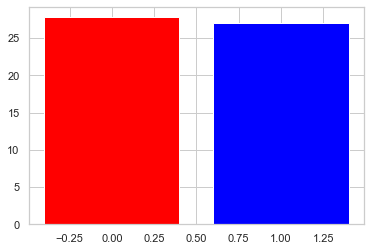

graph for FGM


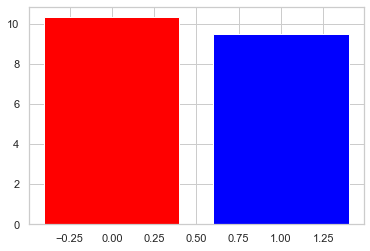

graph for FGA


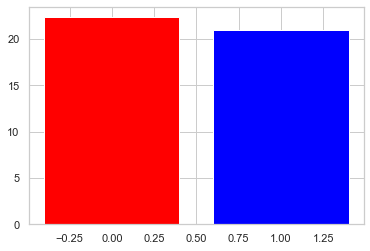

graph for 3PM


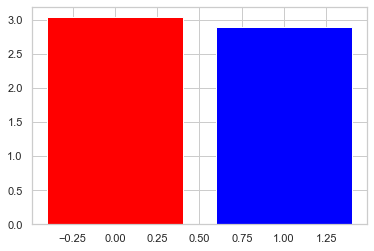

graph for 3PA


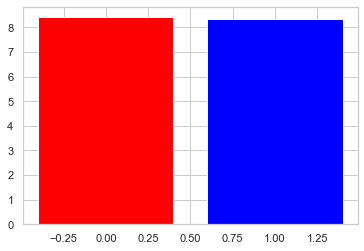

graph for FTM


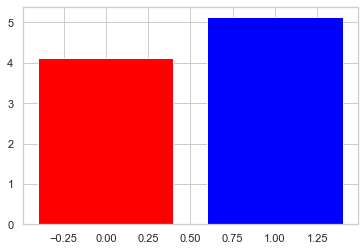

graph for FTA


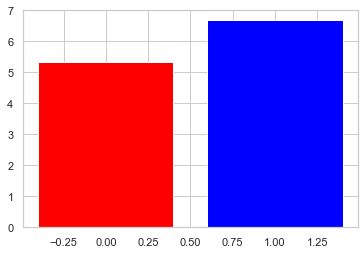

graph for OREB


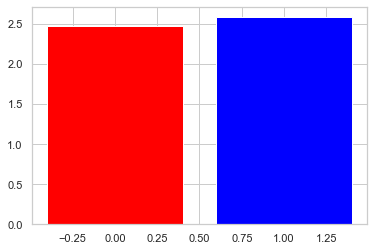

graph for DREB


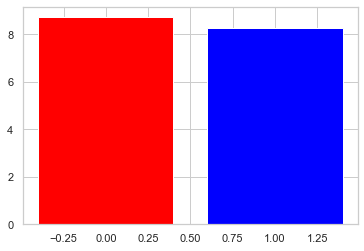

graph for REB


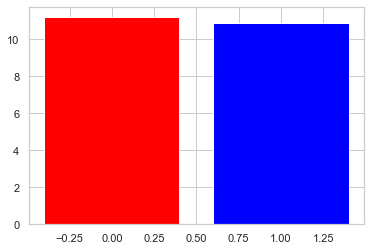

graph for AST


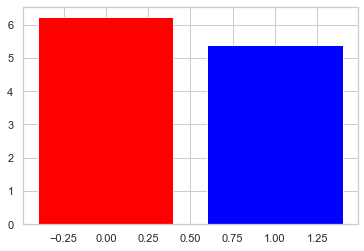

graph for TOV


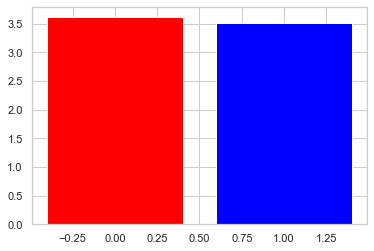

graph for STL


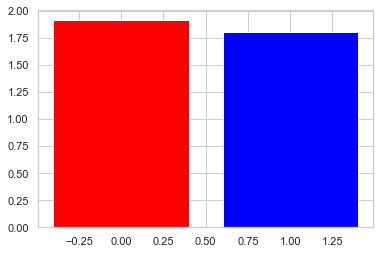

graph for BLK


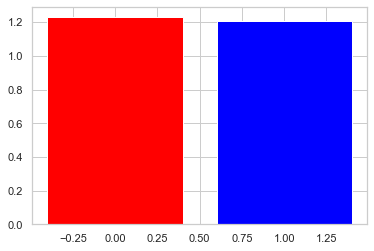

graph for PF


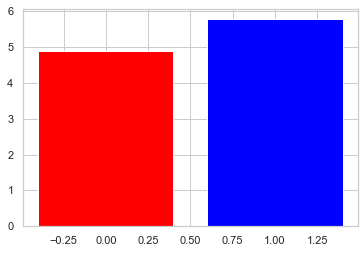

graph for +/-


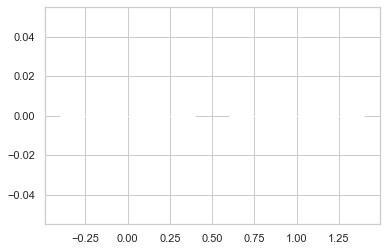

graph for OFFRTG


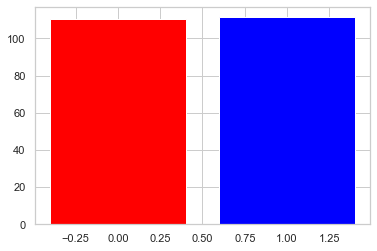

graph for DEFRTG


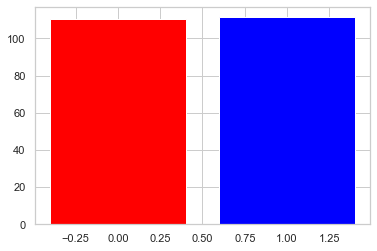

graph for Pace


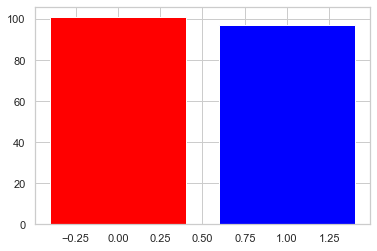

In [45]:
columns=['PTS', 'FGM',
       'FGA', '3PM', '3PA', 'FTM', 'FTA', 'OREB', 'DREB',
       'REB', 'AST', 'TOV', 'STL', 'BLK', 'PF', '+/-',"OFFRTG","DEFRTG","Pace"]
adv=["OFFRTG","DEFRTG","Pace"]

for col in columns:
    if col in adv:
        stat_3=first_3_comp[col].mean()
    else:    
        stat_3=first_3_comp[col].mean()/3
    stat_4=NBA_4th_comp[col].mean()
    sns.set(style="whitegrid")
    print("graph for %s" % (col))
    plt.bar(range(2), [stat_3,stat_4],color=['red', 'blue'])
    plt.show()



In [46]:
#Only differences are in the 4th quarter are more PF and FTA, in the first 3 quarters are more AST

graph for FGM


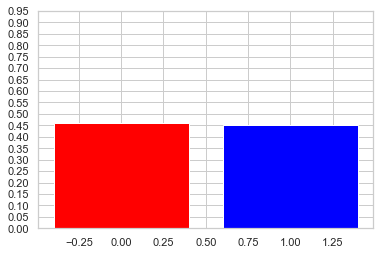

graph for 3PM


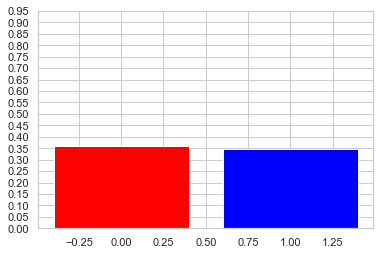

graph for FTM


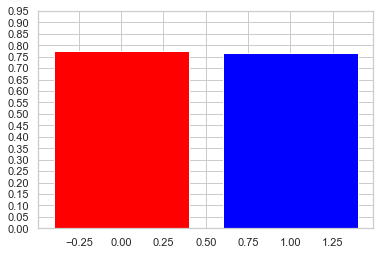

In [47]:
made=['FGM','3PM',  'FTM']
attempt=['FGA','3PA','FTA']      
for m,a in zip(made,attempt):
    stats_3=first_3_comp[m].sum()/first_3_comp[a].sum()
    stats_4=NBA_4th_comp[m].sum()/NBA_4th_comp[a].sum()
    sns.set(style="whitegrid")
    print("graph for %s" % (m))
    plt.bar(range(2), [stats_3,stats_4],color=['red', 'blue'])
    plt.yticks(np.arange(0, 1, 0.05))
    plt.show()
    
   
    

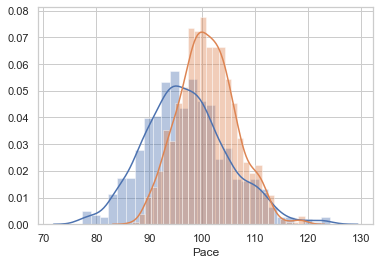

In [68]:
sns.distplot(NBA_4th_comp.Pace)
sns.distplot(first_3_comp.Pace)
plt.show()

In [48]:
first_3_comp["PTS/Q"]=first_3_comp["PTS"]/3
a=NBA_4th_comp.pivot_table(index='week_of_season',values="PTS",aggfunc=np.mean)
b=first_3_comp.pivot_table(index='week_of_season',values="PTS/Q",aggfunc=np.mean)

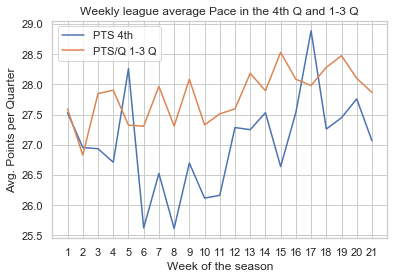

In [49]:
#scoring droped a little bit in the 4th
sns.set(style="whitegrid")
plt.plot(a.index,a.PTS)
plt.plot(b.index,b["PTS/Q"])
plt.legend(["PTS 4th","PTS/Q 1-3 Q"])
plt.title("Weekly league average Pace in the 4th Q and 1-3 Q")
plt.xlabel("Week of the season")
plt.ylabel("Avg. Points per Quarter")
plt.xticks(range(1,22))
plt.show()

In [50]:
c=NBA_4th_comp.pivot_table(index='week_of_season',values="Pace",aggfunc=np.mean)
d=first_3_comp.pivot_table(index='week_of_season',values="Pace",aggfunc=np.mean)

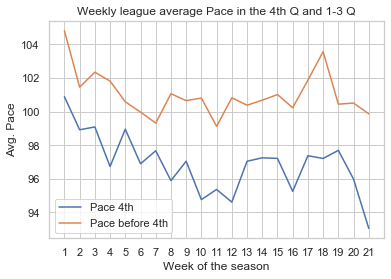

In [51]:
#We can explain the lower points with less possessions
sns.set(style="whitegrid")
plt.plot(c.index,c.Pace)
plt.plot(d.index,d.Pace)
plt.legend(["Pace 4th","Pace before 4th"])
plt.title("Weekly league average Pace in the 4th Q and 1-3 Q")
plt.xlabel("Week of the season")
plt.ylabel("Avg. Pace")
plt.xticks(range(1,22))
plt.show()

In [52]:
e=NBA_4th_comp.pivot_table(index='week_of_season',values="OFFRTG",aggfunc=np.mean)
f=first_3_comp.pivot_table(index='week_of_season',values="OFFRTG",aggfunc=np.mean)

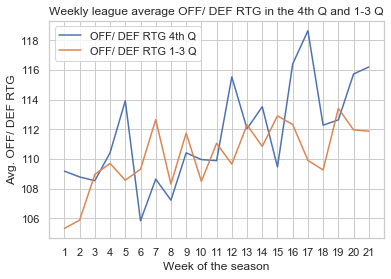

In [53]:
#OFF/DEF RTG don´t look like they´re significant different
sns.set(style="whitegrid")
plt.plot(e.index,e.OFFRTG)
plt.plot(f.index,f.OFFRTG)
plt.legend(["OFF/ DEF RTG 4th Q","OFF/ DEF RTG 1-3 Q"])
plt.title("Weekly league average OFF/ DEF RTG in the 4th Q and 1-3 Q")
plt.xlabel("Week of the season")
plt.ylabel("Avg. OFF/ DEF RTG")
plt.xticks(range(1,22))
plt.show()

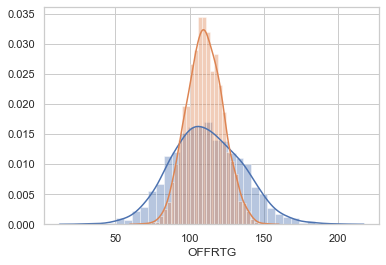

In [67]:

sns.distplot(NBA_4th_comp.OFFRTG)
sns.distplot(first_3_comp.OFFRTG)
plt.show()

### Individual team trends

In [54]:
#adv team stats in the 4th
teams_4th=NBA_4th_comp.pivot_table(index="Team",values=["OFFRTG","DEFRTG","Pace"],aggfunc=np.mean)
teams_4th["NetRTG"]=teams_4th["OFFRTG"]-teams_4th["DEFRTG"]

In [55]:
#adv team stats for thr first 3 qaurters
teams_f3=first_3_comp.pivot_table(index="Team",values=["OFFRTG","DEFRTG","Pace"],aggfunc=np.mean)
teams_f3["NetRTG"]=teams_f3["OFFRTG"]-teams_f3["DEFRTG"]

In [56]:
#compares NetRtg in first 3 and the 4th quarter
#Memphis, Miami, Charlotte get significant worse
#Oklahoma, Lakers stepped up in the 4th quarter
#Minnesota only improved in the 4th, because of really bad NetRTG in the firt 3
#On the other hand, Milwaukee don´t improve much, because their NetRTG was very high in the first 3
teams_4th[["f3OFFRTG","f3DEFRTG","f3Pace","f3NetRTG"]]=teams_f3[["OFFRTG","DEFRTG","Pace","NetRTG"]]
teams_4th["difNetRTG"]=teams_4th["NetRTG"]-teams_4th["f3NetRTG"]
teams_4th

,DEFRTG,OFFRTG,Pace,NetRTG,f3OFFRTG,f3DEFRTG,f3Pace,f3NetRTG,difNetRTG
Team,,,,,,,,,
ATL,109.170579,107.506001,101.928975,-1.664577,110.516574,115.146206,103.313074,-4.629633,2.965055
BKN,111.758809,104.275463,97.881105,-7.483347,109.551514,108.857991,101.962445,0.693523,-8.176869
BOS,112.072270,116.848721,98.146726,4.776451,110.957184,106.121744,99.491814,4.835439,-0.058989
CHA,116.623094,107.048643,92.072593,-9.574451,107.891612,110.869648,96.936862,-2.978036,-6.596415
CHI,112.619512,110.514859,96.332050,-2.104653,105.846661,109.326537,100.516160,-3.479876,1.375223
CLE,113.570357,110.675513,95.085419,-2.894844,107.822060,112.154193,99.861669,-4.332132,1.437288
DAL,108.211773,112.834975,96.695380,4.623202,116.671344,112.807813,100.082544,3.863531,0.759671
DEN,112.965738,113.962212,94.217629,0.996473,111.486667,108.471628,98.068969,3.015039,-2.018565
DET,110.655675,108.173088,94.176059,-2.482586,107.705242,113.775885,98.035681,-6.070643,3.588057


In [57]:
#Difference between home and at the road
teams_4th_C=NBA_4th_comp.pivot_table(index=["Team","Court"],values=["OFFRTG","DEFRTG","Pace"],aggfunc=np.mean)
teams_4th_C["NetRTG"]=teams_4th_C["OFFRTG"]-teams_4th_C["DEFRTG"]

In [58]:
teams_f3_C=first_3_comp.pivot_table(index=["Team","Court"],values=["OFFRTG","DEFRTG","Pace"],aggfunc=np.mean)
teams_f3_C["NetRTG"]=teams_f3_C["OFFRTG"]-teams_f3_C["DEFRTG"]

In [59]:
#most teams improved their 4th quarter NetRTG at home
teams_4th_C[["f3OFFRTG","f3DEFRTG","f3Pace","f3NetRTG"]]=teams_f3_C[["OFFRTG","DEFRTG","Pace","NetRTG"]]
teams_4th_C["difNetRTG"]=teams_4th_C["NetRTG"]-teams_4th_C["f3NetRTG"]
teams_4th_C

DEFRTG      OFFRTG        Pace     NetRTG    f3OFFRTG  \
Team Court                                                              
ATL  0      112.949925  101.241743  102.272862 -11.708182  108.018478   
     1      105.651877  113.338241  101.608805   7.686365  112.842387   
BKN  0      115.671453  104.740803   97.578763 -10.930651  108.233044   
     1      107.411426  103.758418   98.217040  -3.653008  111.016480   
BOS  0      112.432580  114.575118   97.414418   2.142539  109.928745   
     1      111.645237  119.543362   99.014647   7.898124  112.176075   
CHA  0      112.976348  103.116868   92.462869  -9.859480  107.455961   
     1      120.660563  111.401680   91.640502  -9.258883  108.373941   
CHI  0      114.002586  106.605624   97.196848  -7.396962  107.700852   
     1      111.366101  114.057604   95.548327   2.691503  104.166300   
CLE  0      115.238000  109.630480   95.604850  -5.607520  104.078700   
     1      112.386868  111.417149   94.716791  -0.969719  110.478638   
DAL  0      110.553216  111.464063   98.080460   0.910846  118.600563   
     1      105.510107  114.416796   95.097210   8.906689  114.445322   
DEN  0      113.240932  110.040280   92.668210  -3.200652  110.410808   
     1      112.724944  117.393902   95.573370   4.668958  112.428044   
DET  0      111.316276  107.308266   93.646995  -4.008010  105.628044   
     1      110.017853  109.008089   94.686879  -1.009763  109.710812   
GSW  0      105.673478  100.627545   96.780010  -5.045933  107.235940   
     1      111.537567  110.844548   97.329959  -0.693019  105.547010   
HOU  0      115.905006  108.924706  101.493067  -6.980300  117.188493   
     1      108.997002  113.615243  100.759770   4.618241  111.742099   
IND  0      116.717676  112.737511   95.446321  -3.980165  110.559101   
     1      112.740069  113.423436   95.200758   0.683367  108.259861   
LAC  0      109.226146  106.829976   96.259963  -2.396171  111.207449   
     1      101.544694  116.943398   98.539177  15.398704  112.078769   
LAL  0       98.143535  108.967366   95.252792  10.823832  114.199073   
     1      101.015797  111.760455   96.559720  10.744658  113.341682   
MEM  0      115.990829  104.824659  101.156364 -11.166170  110.165119   
     1      115.350650  110.719267   97.810499  -4.631383  110.420444   
MIA  0      115.172154  100.680827   95.131427 -14.491328  111.331111   
     1      109.283554  117.886311   94.329352   8.602757  115.158280   
MIL  0      107.634520  116.888554  102.629462   9.254034  107.161907   
     1      103.908553  112.328622  102.882216   8.420070  114.448605   
MIN  0      113.254230  111.351989   99.034673  -1.902241  110.543228   
     1      110.640066  110.626828   99.003586  -0.013238  102.697762   
NOP  0      109.218203  105.533412   98.030743  -3.684791  109.659494   
     1      116.295020  119.171718   96.657013   2.876698  112.258530   
NYK  0      114.186210  104.426930   94.463456  -9.759280  108.206598   
     1      107.042753  110.584209   94.921818   3.541456  105.552098   
OKC  0      104.013693  110.964466   95.359344   6.950772  110.750127   
     1       99.809164  115.775609   96.878245  15.966445  112.064741   
ORL  0      112.874959  110.413017   96.259721  -2.461941  108.137666   
     1      108.944823  109.060907   94.079254   0.116084  105.814404   
PHI  0      117.316614  112.263923   94.752627  -5.052691  106.314590   
     1       99.649628  111.699270   95.288424  12.049642  112.553975   
PHX  0      126.476640  113.051284   98.208421 -13.425356  107.642030   
     1      113.378690  112.773221  100.293439  -0.605469  109.883443   
POR  0      111.247928  115.947425   98.105325   4.699497  109.232782   
     1      113.373251  116.152806   95.785299   2.779555  113.428666   
SAC  0      110.535655  112.062828   97.740463   1.527173  110.634998   
     1      112.132038  114.532878   95.417663   2.400840  108.365239   
SAS  0      126.531653  110.042470   95.748765 -16.489184  114.295750   
 

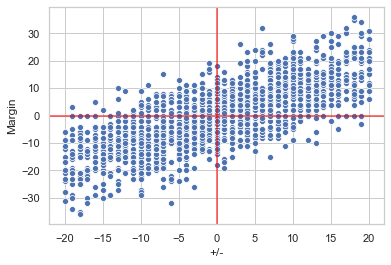

In [60]:
#four diffrent quadrants: 1. Teams ahead after 3rd and win the game 
#2. Teams behind after 3rd and win the game 
#3. Teams behind after 3rd and lose the game
#4. Teams ahead after 3rd and and lose
g=sns.scatterplot(first_3_comp["+/-"],NBA_4th_comp.Margin)
g.axhline(NBA_4th_comp.Margin.mean(),color="red",alpha=0.7)
g.axvline(0,color="red",alpha=0.7)
plt.show()

In [61]:
first_3_comp.to_csv("first_3_comp.csv",index = False)
NBA_4th_comp.to_csv("NBA_4th_comp.csv",index = False)